In [49]:
# https://github.com/RobustBench/robustbench
from robustbench.data import load_cifar10
from robustbench.utils import load_model, clean_accuracy

images, labels = load_cifar10(n_examples=10)
device = "cuda"

Files already downloaded and verified


In [50]:
model_list = ['Wong2020Fast']
device = 'cuda'
for model_name in model_list:
    model = load_model(model_name, norm='Linf').to(device)
    acc = clean_accuracy(model, images.to(device), labels.to(device))
    print('Model: {}'.format(model_name))
    print('- Standard Acc: {}'.format(acc))

Model: Wong2020Fast
- Standard Acc: 1.0


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim

In [52]:
import torchattacks

In [53]:
torchattacks.__version__

'3.2.3'

In [54]:
from torchhk.vis import *
from torchattacks import *

In [55]:
atk = MultiAttack([FGSM(model, eps=8/255), PGD(model, eps=8/255, alpha=2/225, steps=5, random_start=True)])

In [56]:
FGSM(model, eps=8/255).save([(images, labels)])

- Save progress: 100.00 % / Robust accuracy: 60.00 % / L2: 1.73587 (0.016 it/s) 	


In [57]:
PGD(model, eps=8/255, alpha=2/225, steps=5, random_start=True).save([(images, labels)])

- Save progress: 100.00 % / Robust accuracy: 50.00 % / L2: 1.47532 (0.055 it/s) 	


In [58]:
atk.save([(images[:5], labels[:5]), (images[5:], labels[5:])], verbose=True, return_verbose=True)

- Save progress: 100.00 % / Robust accuracy: 50.00 % / Attack success rate: 40.00 % | 50.00 % / L2: 1.68161 (0.048 it/s) 	


(50.0, [40.0, 50.0], 1.681613564491272, 0.04787325859069824)

In [59]:
atk.save([(images, labels)], verbose=True, return_verbose=False)

- Save progress: 100.00 % / Robust accuracy: 50.00 % / Attack success rate: 40.00 % | 50.00 % / L2: 1.68073 (0.068 it/s) 	


In [46]:
atk.save([(images, labels)], verbose=False, return_verbose=False)

In [48]:
atk.save([(images, labels)], verbose=False, return_verbose=True)

(0.0, [60.0, 100.0], 1.5210119485855103, 0.18447518348693848)

In [6]:
from torchhk.vis import *
from torchattacks import *

In [7]:
atks = [FGSM(model, eps=8/255),
BIM(model, eps=8/255, alpha=2/255, steps=5),
RFGSM(model, eps=8/255, alpha=2/255, steps=5),
CW(model, c=1, lr=0.01, steps=100, kappa=0),
PGD(model, eps=8/255, alpha=2/225, steps=5, random_start=True),
PGDL2(model, eps=1, alpha=0.2, steps=5),
EOTPGD(model, eps=8/255, alpha=2/255, steps=5, eot_iter=2),
FFGSM(model, eps=8/255, alpha=10/255),
TPGD(model, eps=8/255, alpha=2/255, steps=5),
MIFGSM(model, eps=8/255, alpha=2/255, steps=5, decay=0.1),
VANILA(model),
GN(model, sigma=0.1),
APGD(model, eps=8/255, steps=5, eot_iter=1, n_restarts=1, loss='ce'),
APGD(model, eps=8/255, steps=5, eot_iter=1, n_restarts=1, loss='dlr'),
APGDT(model, eps=8/255, steps=5, eot_iter=1, n_restarts=1),
FAB(model, eps=8/255, steps=5,n_classes=10, n_restarts=1, targeted=False),
FAB(model, eps=8/255, steps=5, n_classes=10, n_restarts=1, targeted=True),
Square(model, eps=8/255, n_queries=5, n_restarts=1, loss='margin'),
AutoAttack(model, eps=8/255, n_classes=10, version='standard'),
OnePixel(model, pixels=5, inf_batch=1000),
DeepFool(model, steps=5),
SparseFool(model, steps=5),
DIFGSM(model, eps=8/255, alpha=2/255, steps=5, diversity_prob=0.5, resize_rate=0.9)]

FGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, attack_mode=default, return_type=float)
[3 8 8 0 6]
[3 1 6 8 6]


C:\Users\slcf\anaconda3\lib\site-packages\torchvision\utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


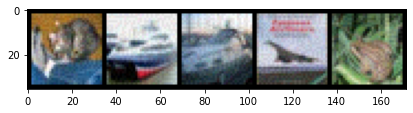

0.4
--------------------------------------------------
BIM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=5, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

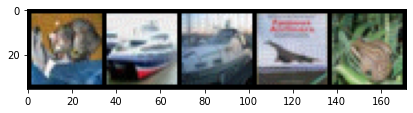

0.0
--------------------------------------------------
RFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=5, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

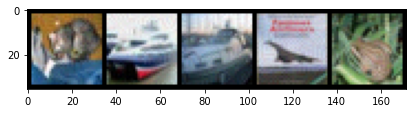

0.0
--------------------------------------------------
CW(model_name=StandardNet, device=cuda:0, c=1, kappa=0, steps=100, lr=0.01, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

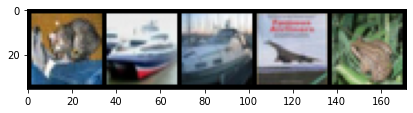

0.0
--------------------------------------------------
PGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.008888888888888889, steps=5, random_start=True, attack_mode=default, return_type=float)
[3 8 8 0 6]
[6 1 1 8 1]


<Figure size 432x288 with 0 Axes>

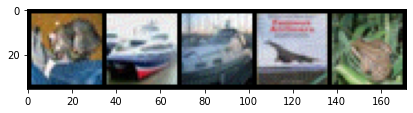

0.0
--------------------------------------------------
PGDL2(model_name=StandardNet, device=cuda:0, eps=1, alpha=0.2, steps=5, random_start=True, eps_for_division=1e-10, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

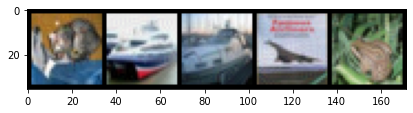

0.0
--------------------------------------------------
EOTPGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=5, eot_iter=2, random_start=True, attack_mode=default, return_type=float)
[3 8 8 0 6]
[2 1 1 8 4]


<Figure size 432x288 with 0 Axes>

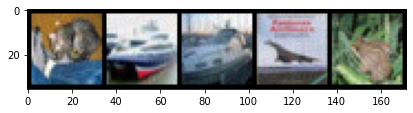

0.0
--------------------------------------------------
FFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.0392156862745098, attack_mode=default, return_type=float)
[3 8 8 0 6]
[6 1 2 8 6]


<Figure size 432x288 with 0 Axes>

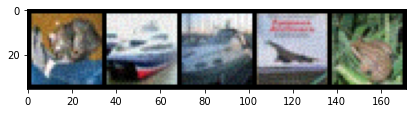

0.2
--------------------------------------------------
TPGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=5, attack_mode=default, return_type=float)
[3 8 8 0 6]
[6 8 1 0 1]


<Figure size 432x288 with 0 Axes>

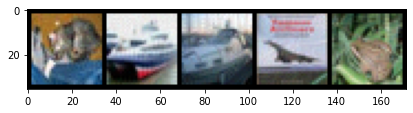

0.4
--------------------------------------------------
MIFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, steps=5, decay=0.1, alpha=0.00784313725490196, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

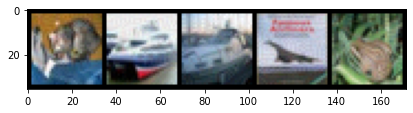

0.0
--------------------------------------------------
VANILA(model_name=StandardNet, device=cuda:0, attack_mode=default, return_type=float)
[3 8 8 0 6]
[3 8 8 0 6]


<Figure size 432x288 with 0 Axes>

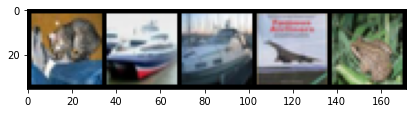

1.0
--------------------------------------------------
GN(model_name=StandardNet, device=cuda:0, sigma=0.1, attack_mode=default, return_type=float)
[3 8 8 0 6]
[3 6 6 2 6]


<Figure size 432x288 with 0 Axes>

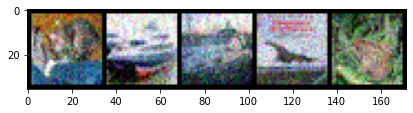

0.4
--------------------------------------------------
APGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, steps=5, norm=Linf, n_restarts=1, seed=0, loss=ce, eot_iter=1, thr_decr=0.75, verbose=False, attack_mode=default, return_type=float)
[3 8 8 0 6]
[6 1 2 8 4]


<Figure size 432x288 with 0 Axes>

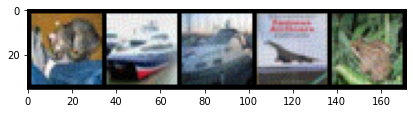

0.0
--------------------------------------------------
APGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, steps=5, norm=Linf, n_restarts=1, seed=0, loss=dlr, eot_iter=1, thr_decr=0.75, verbose=False, attack_mode=default, return_type=float)
[3 8 8 0 6]
[2 1 1 2 1]


<Figure size 432x288 with 0 Axes>

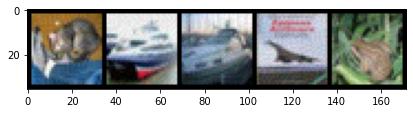

0.0
--------------------------------------------------
APGDT(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, steps=5, norm=Linf, n_restarts=1, seed=0, eot_iter=1, thr_decr=0.75, verbose=False, target_class=None, n_target_classes=9, attack_mode=default, return_type=float)
[3 8 8 0 6]
[6 0 2 2 3]


<Figure size 432x288 with 0 Axes>

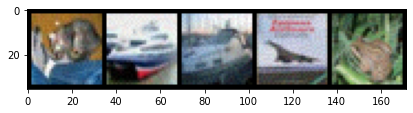

0.0
--------------------------------------------------
FAB(model_name=StandardNet, device=cuda:0, norm=Linf, n_restarts=1, eps=0.03137254901960784, alpha_max=0.1, eta=1.05, beta=0.9, steps=5, targeted=False, verbose=False, seed=0, target_class=None, n_target_classes=9, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

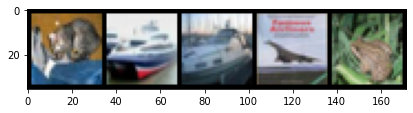

0.0
--------------------------------------------------
FAB(model_name=StandardNet, device=cuda:0, norm=Linf, n_restarts=1, eps=0.03137254901960784, alpha_max=0.1, eta=1.05, beta=0.9, steps=5, targeted=False, verbose=False, seed=0, target_class=None, n_target_classes=9, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

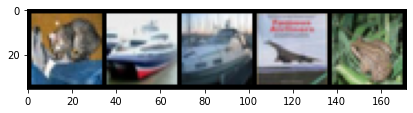

0.0
--------------------------------------------------
Square(model_name=StandardNet, device=cuda:0, norm=Linf, n_queries=5, eps=0.03137254901960784, p_init=0.8, n_restarts=1, seed=0, verbose=False, loss=margin, rescale_schedule=True, attack_mode=default, return_type=float)
[3 8 8 0 6]
[3 8 8 3 6]


<Figure size 432x288 with 0 Axes>

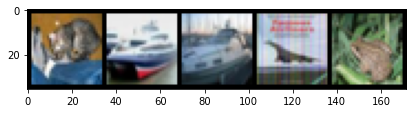

0.8
--------------------------------------------------
AutoAttack(model_name=StandardNet, device=cuda:0, norm=Linf, eps=0.03137254901960784, version=standard, n_classes=10, seed=None, verbose=False, autoattack=MultiAttack(model_name=StandardNet, device=cuda:0, attacks=[<torchattacks.attacks.apgd.APGD object at 0x00000228C645DFD0>, <torchattacks.attacks.apgdt.APGDT object at 0x00000228C645DFA0>, <torchattacks.attacks.fab.FAB object at 0x00000228C6467070>, <torchattacks.attacks.square.Square object at 0x00000228C64670A0>], verbose=False, attack_mode=default, return_type=float), attack_mode=default, return_type=float)
[3 8 8 0 6]
[6 1 2 8 4]


<Figure size 432x288 with 0 Axes>

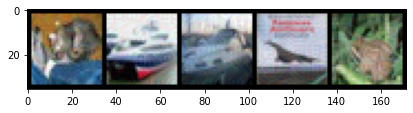

0.0
--------------------------------------------------
OnePixel(model_name=StandardNet, device=cuda:0, pixels=5, steps=75, popsize=400, inf_batch=1000, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 4]


<Figure size 432x288 with 0 Axes>

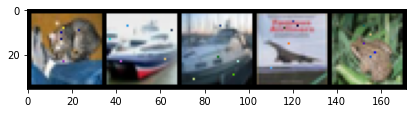

0.0
--------------------------------------------------
DeepFool(model_name=StandardNet, device=cuda:0, steps=5, overshoot=0.02, attack_mode=default, return_type=float)
[3 8 8 0 6]
[1 8 1 8 1]


<Figure size 432x288 with 0 Axes>

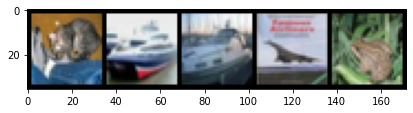

0.2
--------------------------------------------------
SparseFool(model_name=StandardNet, device=cuda:0, steps=5, lam=3, overshoot=0.02, deepfool=DeepFool(model_name=StandardNet, device=cuda:0, steps=50, overshoot=0.02, attack_mode=default, return_type=float), attack_mode=default, return_type=float)
[3 8 8 0 6]
[3 8 1 0 6]


<Figure size 432x288 with 0 Axes>

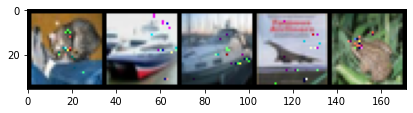

0.8
--------------------------------------------------
DIFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, steps=5, decay=0.0, alpha=0.00784313725490196, resize_rate=0.9, diversity_prob=0.5, random_start=False, attack_mode=default, return_type=float)
[3 8 8 0 6]
[5 1 1 8 1]


<Figure size 432x288 with 0 Axes>

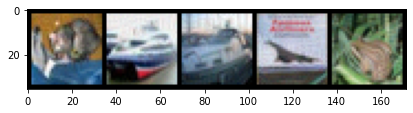

0.0
--------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [8]:
for atk in atks:
    print(atk)
    adv_images = atk(images, labels)
    print(labels.cpu().numpy())
    pre = model(adv_images.to(device))
    _, pre = torch.max(pre, dim=1)
    print(pre.cpu().numpy())
    plot_img(init_plot(), adv_images[:5], ncols=5)
    plt.show()
    plt.clf()
    print(clean_accuracy(model, adv_images.to(device), labels.to(device)))
    print("-"*50)

In [20]:
atks = [
FGSM(model, eps=8/255),
BIM(model, eps=8/255, alpha=2/255, steps=100),
RFGSM(model, eps=8/255, alpha=2/255, steps=100),
CW(model, c=1, lr=0.01, steps=100, kappa=0),
PGD(model, eps=8/255, alpha=2/225, steps=100, random_start=True),
PGDL2(model, eps=1, alpha=0.2, steps=100),
EOTPGD(model, eps=8/255, alpha=2/255, steps=100, eot_iter=1),
EOTPGD(model, eps=8/255, alpha=2/255, steps=100, eot_iter=2),
FFGSM(model, eps=8/255, alpha=10/255),
TPGD(model, eps=8/255, alpha=2/255, steps=100),
MIFGSM(model, eps=8/255, alpha=2/255, steps=100, decay=0.1),
VANILA(model),
GN(model, sigma=0.1),
APGD(model, eps=8/255, steps=100, eot_iter=1, n_restarts=1, loss='ce'),
APGD(model, eps=8/255, steps=100, eot_iter=1, n_restarts=1, loss='dlr'),
APGDT(model, eps=8/255, steps=100, eot_iter=1, n_restarts=1),
FAB(model, eps=8/255, steps=100, n_classes=10, n_restarts=1, targeted=False),
FAB(model, eps=8/255, steps=100, n_classes=10, n_restarts=1, targeted=True),
Square(model, eps=8/255, n_queries=5000, n_restarts=1, loss='ce'),
AutoAttack(model, eps=8/255, n_classes=10, version='standard'),
OnePixel(model, pixels=5, inf_batch=1000),
DeepFool(model, steps=50),
SparseFool(model, steps=50),
DIFGSM(model, eps=8/255, alpha=2/255, steps=100, diversity_prob=0.5, resize_rate=0.9)
]

Attack mode is changed to 'targeted(least-likely).'
FGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[3 1 2 8 6]


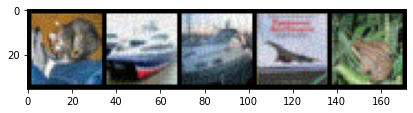

0.4
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
BIM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=100, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

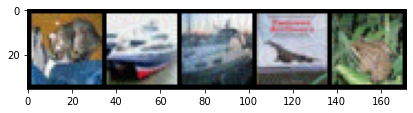

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
RFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=100, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

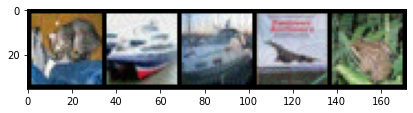

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
CW(model_name=StandardNet, device=cuda:0, c=1, kappa=0, steps=100, lr=0.01, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 1 1 8 7]


<Figure size 432x288 with 0 Axes>

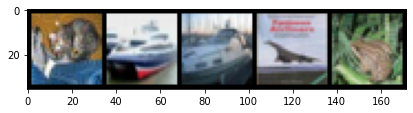

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
PGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.008888888888888889, steps=100, random_start=True, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

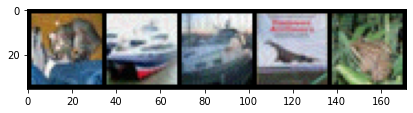

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
PGDL2(model_name=StandardNet, device=cuda:0, eps=1, alpha=0.2, steps=100, random_start=True, eps_for_division=1e-10, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

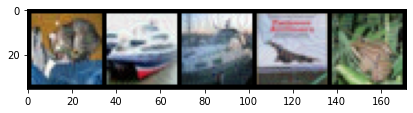

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
EOTPGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=100, eot_iter=1, random_start=True, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

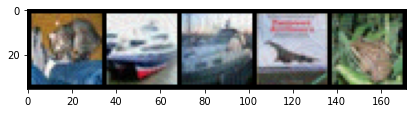

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
EOTPGD(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.00784313725490196, steps=100, eot_iter=2, random_start=True, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

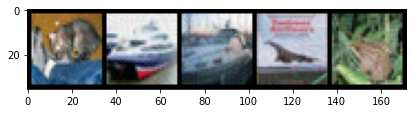

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
FFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, alpha=0.0392156862745098, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[3 1 1 8 6]


<Figure size 432x288 with 0 Axes>

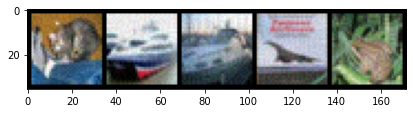

0.4
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
MIFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, steps=100, decay=0.1, alpha=0.00784313725490196, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

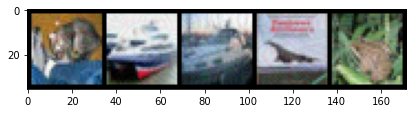

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
Square(model_name=StandardNet, device=cuda:0, norm=Linf, n_queries=5000, eps=0.03137254901960784, p_init=0.8, n_restarts=1, seed=0, verbose=False, loss=ce, rescale_schedule=True, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

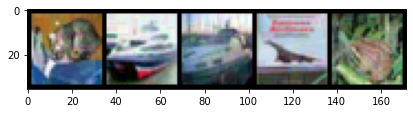

0.0
--------------------------------------------------
Attack mode is changed to 'targeted(least-likely).'
DIFGSM(model_name=StandardNet, device=cuda:0, eps=0.03137254901960784, steps=100, decay=0.0, alpha=0.00784313725490196, resize_rate=0.9, diversity_prob=0.5, random_start=False, attack_mode=targeted(least-likely), return_type=float)
tensor([9, 5, 4, 5, 7], device='cuda:0')
tensor([9, 5, 4, 5, 7], device='cuda:0')
[3 8 8 0 6]
[9 5 4 5 7]
[9 5 4 5 7]


<Figure size 432x288 with 0 Axes>

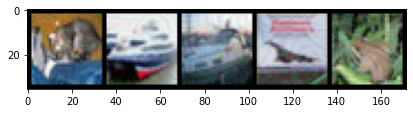

0.0
--------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [21]:
for atk in atks:
    if 'targeted' in atk._supported_mode:
        atk.set_mode_targeted_least_likely()
        print(atk)
        adv_images = atk(images, labels)
        print(atk._get_target_label(images.to(device), None))
        print(atk._target_map_function(images.to(device), labels.to(device)))
        print(labels.cpu().numpy())
        pre = model(images.to(device))
        _, pre = torch.min(pre, dim=1)
        print(pre.cpu().numpy())
        pre = model(adv_images.to(device))
        _, pre = torch.max(pre, dim=1)
        print(pre.cpu().numpy())
        plot_img(init_plot(), adv_images[:5], ncols=5)
        plt.show()
        plt.clf()
        print(clean_accuracy(model, adv_images.to(device), labels.to(device)))
        print("-"*50)

MultiAttack(model_name=StandardNet, device=cuda:0, attacks=[<torchattacks.attacks.square.Square object at 0x0000022A4FADED90>], verbose=False, attack_mode=default, return_type=float)


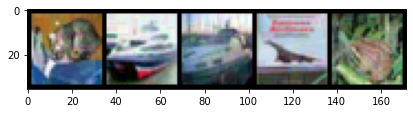

0.0
--------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [12]:
atk = MultiAttack(atks[:3])
print(atk)
adv_images = atk(images, labels)
plot_img(init_plot(), adv_images[:5], ncols=5)
plt.show()
plt.clf()
print(clean_accuracy(model, adv_images.to(device), labels.to(device)))
print("-"*50)
atk.save(data_loader=[(images, labels), (images, labels)], save_path=None, verbose=True)

In [13]:
atk = UPGD(model, eps=8/255, alpha=2/255, steps=40,
           random_start=False, loss='ce', decay=0.0, eot_iter=2)
atk.save(data_loader=[(images, labels)], save_path=None, verbose=True)

- Save progress: 100.00 % / Accuracy: 0.00 % / L2: 1.36759 (1.868 it/s) 	


In [14]:
atk = UPGD(model, eps=8/255, alpha=2/255, steps=40,
           random_start=False, loss='margin', decay=1.0, eot_iter=2)
atk.save(data_loader=[(images, labels)], save_path=None, verbose=True)

- Save progress: 100.00 % / Accuracy: 0.00 % / L2: 0.63704 (1.986 it/s) 	


In [15]:
atk = UPGD(model, eps=8/255, alpha=2/255, steps=40,
           random_start=False, loss='dlr', decay=1.0, eot_iter=2)
atk.save(data_loader=[(images, labels)], save_path=None, verbose=True)

- Save progress: 100.00 % / Accuracy: 0.00 % / L2: 1.01384 (1.995 it/s) 	


Attack mode is changed to 'targeted(least-likely).'


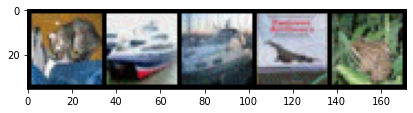

[9 5 4 5 7]
[9 5 4 5 7]
- Save progress: 100.00 % / Accuracy: 0.00 % / L2: 1.30026 (2.411 it/s) 	


<Figure size 432x288 with 0 Axes>

In [16]:
atk = UPGD(model, eps=8/255, alpha=2/255, steps=100,
           random_start=False, loss='ce', decay=0.0, eot_iter=1)
atk.set_mode_targeted_least_likely()
adv_images = atk(images, labels)
plot_img(init_plot(), adv_images[:5], ncols=5)
plt.show()
plt.clf()
pre = model(images.to(device))
_, pre = torch.min(pre, dim=1)
print(pre.cpu().numpy())
pre = model(adv_images.to(device))
_, pre = torch.max(pre, dim=1)
print(pre.cpu().numpy())
atk.save(data_loader=[(images, labels), (images, labels)], save_path=None, verbose=True)

Attack mode is changed to 'targeted(least-likely).'


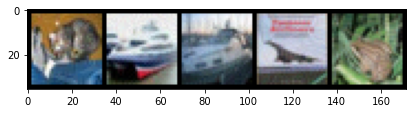

[9 5 4 5 7]
[9 5 4 5 7]
- Save progress: 100.00 % / Accuracy: 0.00 % / L2: 0.95974 (4.932 it/s) 	


<Figure size 432x288 with 0 Axes>

In [17]:
atk = UPGD(model, eps=8/255, alpha=2/255, steps=100,
           random_start=False, loss='margin', decay=0.0, eot_iter=2)
atk.set_mode_targeted_least_likely()
adv_images = atk(images, labels)
plot_img(init_plot(), adv_images[:5], ncols=5)
plt.show()
plt.clf()
pre = model(images.to(device))
_, pre = torch.min(pre, dim=1)
print(pre.cpu().numpy())
pre = model(adv_images.to(device))
_, pre = torch.max(pre, dim=1)
print(pre.cpu().numpy())
atk.save(data_loader=[(images, labels), (images, labels)], save_path=None, verbose=True)

Attack mode is changed to 'targeted(least-likely).'


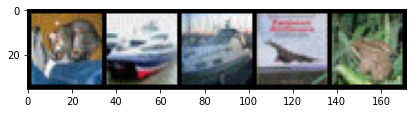

[9 5 4 5 7]
[1 0 4 5 4]
- Save progress: 100.00 % / Accuracy: 0.00 % / L2: 1.22614 (5.051 it/s) 	


<Figure size 432x288 with 0 Axes>

In [22]:
atk = UPGD(model, eps=8/255, alpha=2/255, steps=100,
           random_start=False, loss='dlr', decay=0.0, eot_iter=2)
atk.set_mode_targeted_least_likely()
adv_images = atk(images, labels)
plot_img(init_plot(), adv_images[:5], ncols=5)
plt.show()
plt.clf()
pre = model(images.to(device))
_, pre = torch.min(pre, dim=1)
print(pre.cpu().numpy())
pre = model(adv_images.to(device))
_, pre = torch.max(pre, dim=1)
print(pre.cpu().numpy())
atk.save(data_loader=[(images, labels), (images, labels)], save_path=None, verbose=True)